In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

In [2]:
# Load data

data = pd.read_csv('data/hotel_bookings.csv')

In [4]:
# Replace nan in column agent and company with 0

data['agent'] = data['agent'].replace(np.nan,0)
data['company'] = data['company'].replace(np.nan,0)

# sum up children and babies in one column
#data['children_all'] = data['children'] + data['babies']

# Drop rows where country and children is null
data.dropna(how='any', axis=0, inplace=True)

# replace negative and 0 adr with mean
mean_adr = data['adr'].mean().astype(int)
data['adr'] = data['adr'].apply(lambda x: mean_adr if x <= 0 else x)

# replace high adr >2000 with mean
mean_adr = data['adr'].mean().astype(int)
data['adr'] = data['adr'].apply(lambda x: mean_adr if x > 2000 else x)

# create date-time column
data['arrival_date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str),format='%Y-%B-%d')

# create arrival day of year column
data['arrival_day'] = data['arrival_date'].dt.day_of_year

# Drop arrival_date_year, arrival_date_month, arrival_date_day_of_month, arrival_date_week_number
data.drop(['arrival_date_year',
           'arrival_date_month',
           'arrival_date_day_of_month',
           'arrival_date_week_number'],axis=1, inplace=True)

# calculate duration of stay
# data['duration_of_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# drop stays_in_weekend_nights and stays_in_week_nights
# data.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1, inplace=True)

# drop reservation_status_date and reservation_status
data.drop(['reservation_status_date', 'reservation_status'],axis=1, inplace=True)

data.drop(['distribution_channel',
           'is_repeated_guest',
           'previous_cancellations',
           'previous_bookings_not_canceled',
           'assigned_room_type',
           'booking_changes',
           'country',
           'company',
           'days_in_waiting_list',
           'customer_type',
           'deposit_type'],axis=1, inplace=True)

# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time
filter = (data.children == 0) & (data.adults == 0) & (data.babies == 0)
data = data[~filter]

# reset index
data = data.reset_index().drop('index', axis=1)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118728 entries, 0 to 118727
Data columns (total 17 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   hotel                        118728 non-null  object        
 1   is_canceled                  118728 non-null  int64         
 2   lead_time                    118728 non-null  int64         
 3   stays_in_weekend_nights      118728 non-null  int64         
 4   stays_in_week_nights         118728 non-null  int64         
 5   adults                       118728 non-null  int64         
 6   children                     118728 non-null  float64       
 7   babies                       118728 non-null  int64         
 8   meal                         118728 non-null  object        
 9   market_segment               118728 non-null  object        
 10  reserved_room_type           118728 non-null  object        
 11  agent                     

In [7]:
data.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,reserved_room_type,agent,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,arrival_day
0,Resort Hotel,0,342,0,0,2,0.0,0,BB,Direct,C,0.0,102.0,0,0,2015-07-01,182
1,Resort Hotel,0,737,0,0,2,0.0,0,BB,Direct,C,0.0,102.0,0,0,2015-07-01,182
2,Resort Hotel,0,7,0,1,1,0.0,0,BB,Direct,A,0.0,75.0,0,0,2015-07-01,182
3,Resort Hotel,0,13,0,1,1,0.0,0,BB,Corporate,A,304.0,75.0,0,0,2015-07-01,182
4,Resort Hotel,0,14,0,2,2,0.0,0,BB,Online TA,A,240.0,98.0,0,1,2015-07-01,182


In [8]:
# get categorical columns

cat_cols = [col for col in data.columns if data[col].dtype == 'object']

In [10]:
# create dataframe with all categorical values
cat_df = data[cat_cols]

In [12]:
# Apply a label encoder for categorical values

from sklearn.preprocessing import LabelEncoder
le_hotel = LabelEncoder()
cat_df['hotel'] = le_hotel.fit_transform(cat_df['hotel'])

le_meal = LabelEncoder()
cat_df['meal'] = le_meal.fit_transform(cat_df['meal'])

le_market = LabelEncoder()
cat_df['market_segment'] = le_market.fit_transform(cat_df['market_segment'])

le_room = LabelEncoder()
cat_df['reserved_room_type'] = le_room.fit_transform(cat_df['reserved_room_type'])

/var/folders/k4/15639thj2wv04zjsd9344mlm0000gn/T/ipykernel_2761/829665091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['hotel'] = le_hotel.fit_transform(cat_df['hotel'])
/var/folders/k4/15639thj2wv04zjsd9344mlm0000gn/T/ipykernel_2761/829665091.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['meal'] = le_meal.fit_transform(cat_df['meal'])
/var/folders/k4/15639thj2wv04zjsd9344mlm0000gn/T/ipykernel_2761/829665091.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [14]:
# create dataframe for all numerical values

num_df = data.drop(columns= cat_cols, axis =1)

In [16]:
num_df.drop(['is_canceled', 'adr', 'arrival_date'], axis=1, inplace=True)

## Define Features and Target

In [17]:
# Separate features and target

X = pd.concat([cat_df, num_df], axis=1)
y = data['adr']

In [18]:
X.head()

,hotel,meal,market_segment,reserved_room_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,agent,required_car_parking_spaces,total_of_special_requests,arrival_day
0,1,0,3,2,342,0,0,2,0.0,0,0.0,0,0,182
1,1,0,3,2,737,0,0,2,0.0,0,0.0,0,0,182
2,1,0,3,0,7,0,1,1,0.0,0,0.0,0,0,182
3,1,0,2,0,13,0,1,1,0.0,0,304.0,0,0,182
4,1,0,6,0,14,0,2,2,0.0,0,240.0,0,1,182


In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118728 entries, 0 to 118727
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        118728 non-null  int64  
 1   meal                         118728 non-null  int64  
 2   market_segment               118728 non-null  int64  
 3   reserved_room_type           118728 non-null  int64  
 4   lead_time                    118728 non-null  int64  
 5   stays_in_weekend_nights      118728 non-null  int64  
 6   stays_in_week_nights         118728 non-null  int64  
 7   adults                       118728 non-null  int64  
 8   children                     118728 non-null  float64
 9   babies                       118728 non-null  int64  
 10  agent                        118728 non-null  float64
 11  required_car_parking_spaces  118728 non-null  int64  
 12  total_of_special_requests    118728 non-null  int64  
 13 

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Normalize features
X_scaled = scaler.fit_transform(X)

In [21]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Train Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [23]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
hotel,-12.667087
meal,5.101216
market_segment,2.556476
reserved_room_type,16.449405
lead_time,-3.966745
stays_in_weekend_nights,-1.043389
stays_in_week_nights,0.950400
adults,6.626898
children,9.629476
babies,0.430303


## Model Prediction

In [24]:
pred_lm = lm.predict(X_test)

Text(0.5, 0, 'adr')

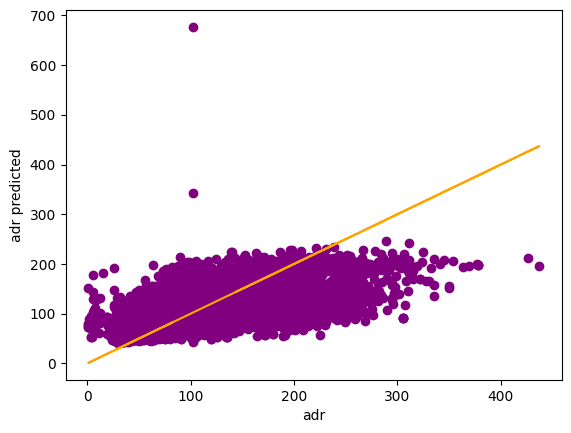

In [25]:
plt.scatter(y_test,pred_lm, c='purple')
plt.plot(y_test,y_test, c='orange')
plt.ylabel('adr predicted')
plt.xlabel('adr')

In [26]:
from sklearn import metrics
from sklearn.metrics import r2_score 

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_lm))
print('MSE:', metrics.mean_squared_error(y_test, pred_lm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lm)))
print('R^2:', r2_score(y_test, pred_lm))

MAE: 27.68341644819517
MSE: 1395.9227106187705
RMSE: 37.36204906879132
R^2: 0.33781656507702473


In [28]:
# initialize model comparison
model_comparison = {'Linear Regression': r2_score(y_test, pred_lm)}

## Decision Tree Regression

In [29]:
from sklearn.tree import DecisionTreeRegressor 

dtree = DecisionTreeRegressor() 

dtree.fit(X_train, y_train) 

DecisionTreeRegressor()

In [30]:
pred_dtree = dtree.predict(X_test)

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_dtree))
print('MSE:', metrics.mean_squared_error(y_test, pred_dtree))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_dtree)))
print('R^2:', r2_score(y_test, pred_dtree))

model_comparison['Decision Tree']=r2_score(y_test, pred_dtree)

MAE: 10.343101536244523
MSE: 473.46734539890684
RMSE: 21.75930480045047
R^2: 0.77540143826363


Text(0.5, 0, 'adr')

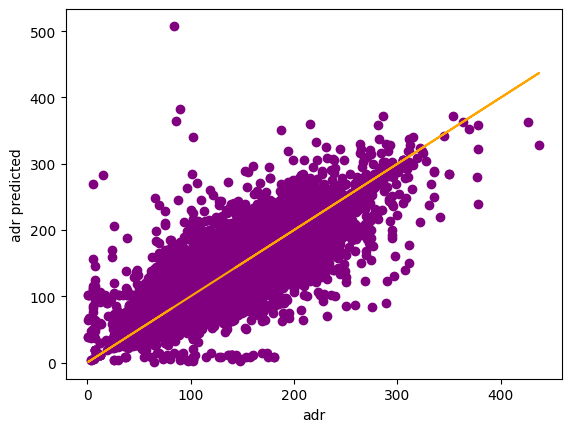

In [32]:
plt.scatter(y_test,pred_dtree, c='purple')
plt.plot(y_test,y_test, c='orange')
plt.ylabel('adr predicted')
plt.xlabel('adr')

## Random Forest Regression

In [33]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
pred_rfr = rfr.predict(X_test)

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_rfr))
print('MSE:', metrics.mean_squared_error(y_test, pred_rfr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_rfr)))
print('R^2:', r2_score(y_test, pred_rfr))

model_comparison['Random Forest Regression']=r2_score(y_test, pred_rfr)

MAE: 8.508223788701832
MSE: 251.6955794208978
RMSE: 15.864916621933371
R^2: 0.8806032439561218


Text(0.5, 1.0, 'Random Forest Regressor')

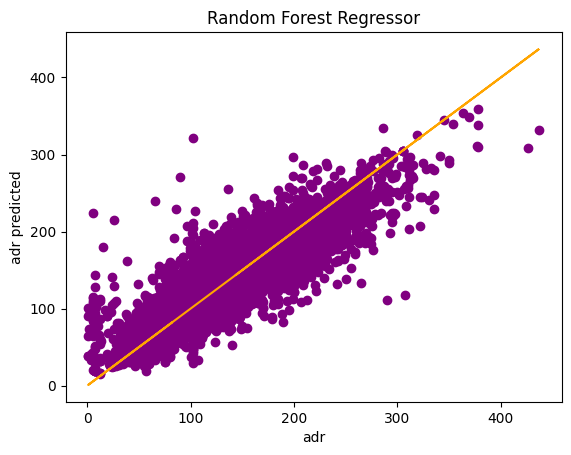

In [50]:
plt.scatter(y_test,pred_rfr, c='purple')
plt.plot(y_test,y_test, c='orange')
plt.ylabel('adr predicted')
plt.xlabel('adr')
plt.title('Random Forest Regressor')

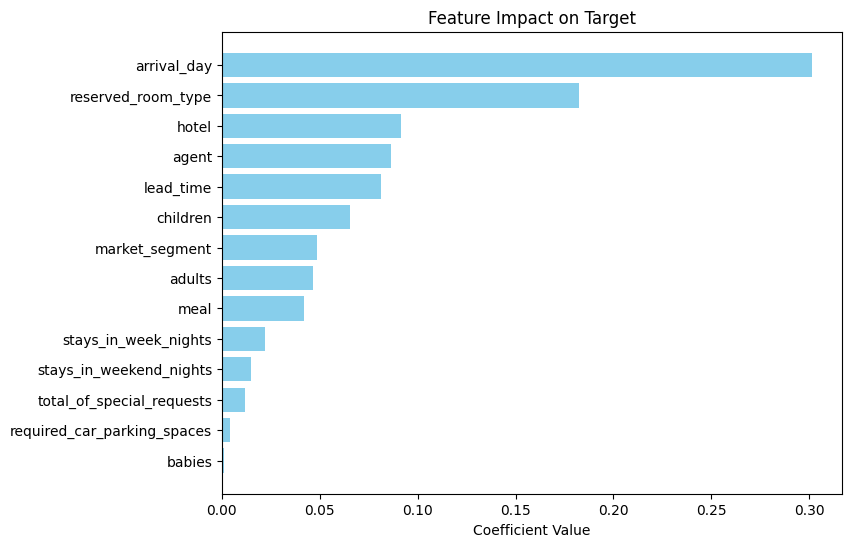

In [37]:
# Retrieve and interpret features

coeff_rfr = rfr.feature_importances_

# Map coefficients to feature names

features = X.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coeff_rfr})

# Sort coefficient by absolute values
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

plt.figure(figsize=(8, 6))
plt.barh(coef_df['Feature'], coef_df['Absolute_Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Impact on Target')
plt.gca().invert_yaxis()  # Highest impact on top
plt.show()

## AdaBoost

In [38]:
from sklearn.ensemble import AdaBoostRegressor
adar =  AdaBoostRegressor(n_estimators=2) # number of trees = 100
adar.fit(X_train, y_train)

# Prediction
prediction_adar = adar.predict(X_test)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_adar))
print('MSE:', metrics.mean_squared_error(y_test, prediction_adar))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_adar)))
print('R^2:', r2_score(y_test, prediction_adar))

model_comparison['AdaBoost']=r2_score(y_test, prediction_adar)

MAE: 27.75325518138436
MSE: 1391.3691645689848
RMSE: 37.301061172156814
R^2: 0.33997662934232376


## Gradient Boosting

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbr =  GradientBoostingRegressor(n_estimators=100) # number of trees = 100
gbr.fit(X_train, y_train)

# Prediction
prediction_gbr = gbr.predict(X_test)

In [41]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_gbr))
print('MSE:', metrics.mean_squared_error(y_test, prediction_gbr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_gbr)))
print('R^2:', r2_score(y_test, prediction_gbr))

model_comparison['Gradient Boosting']=r2_score(y_test, prediction_gbr)

MAE: 17.051612484900815
MSE: 564.1222188089513
RMSE: 23.751257204808155
R^2: 0.7323975133252921


## XG Boost

In [42]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(n_estimators = 100)

# Train model
xgbr.fit(X_train, y_train)

# Prediction
prediction_xgbr = xgbr.predict(X_test)

In [43]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction_xgbr))
print('MSE:', metrics.mean_squared_error(y_test, prediction_xgbr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_xgbr)))
print('R^2:', r2_score(y_test, prediction_xgbr))

model_comparison['Gradient Boosting']=r2_score(y_test, prediction_xgbr)

MAE: 11.393264792314687
MSE: 293.86453924844955
RMSE: 17.142477628640776
R^2: 0.8605995672100364


## SVM

In [44]:
'''

from sklearn.svm import SVR

model_svr = SVR()

# Train model
model_svr.fit(X_train, y_train)

# Predict
prediction_svr = model_svr.predict(X_test)

'''

'\n\nfrom sklearn.svm import SVR\n\nmodel_svr = SVR()\n\n# Train model\nmodel_svr.fit(X_train, y_train)\n\n# Predict\nprediction_svr = model_svr.predict(X_test)\n\n'

In [45]:
'''

print('MAE:', metrics.mean_absolute_error(y_test, prediction_svr))
print('MSE:', metrics.mean_squared_error(y_test, prediction_svr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_svr)))
print('R^2:', r2_score(y_test, prediction_svr))

'''

"\n\nprint('MAE:', metrics.mean_absolute_error(y_test, prediction_svr))\nprint('MSE:', metrics.mean_squared_error(y_test, prediction_svr))\nprint('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction_svr)))\nprint('R^2:', r2_score(y_test, prediction_svr))\n\n"

## Comparison of the models

/var/folders/k4/15639thj2wv04zjsd9344mlm0000gn/T/ipykernel_2761/1972786033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Model', x = 'R^2 Score', data = model_df, palette= 'plasma')


Text(0.5, 1.0, 'Model Comparison')

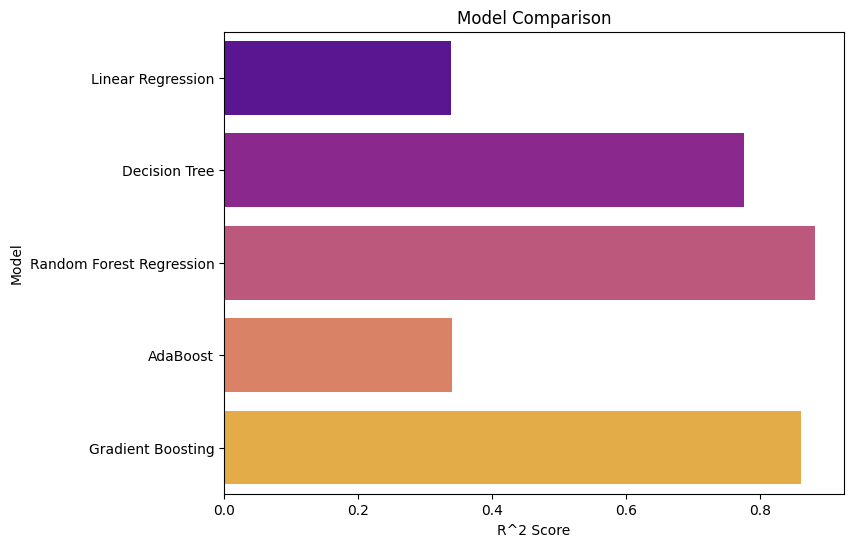

In [46]:
# plot accuracy scores of the different models
model_df = pd.DataFrame(list(model_comparison.items()), columns=['Model', 'R^2 Score'])
plt.figure(figsize=(8,6))
sns.barplot(y='Model', x = 'R^2 Score', data = model_df, palette= 'plasma')
plt.title('Model Comparison')
#plt.xlim(0.6,1)

## Export LabelEncoder, Model and Scaler

In [47]:
import pickle

# save the labelEncoder
with open('.streamlit/model_adr/label_hotel.pkl', 'wb') as f:
  pickle.dump(le_hotel, f)

with open('.streamlit/model_adr/label_meal.pkl', 'wb') as f:
  pickle.dump(le_meal, f)

with open('.streamlit/model_adr/label_market.pkl', 'wb') as f:
  pickle.dump(le_market, f)

with open('.streamlit/model_adr/label_room.pkl', 'wb') as f:
  pickle.dump(le_room, f)

#save the scaler
with open('.streamlit/model_adr/scaler_adr.pkl', 'wb') as f:
  pickle.dump(scaler, f)

#save the model
with open('.streamlit/model_adr/ML_adr.pkl', 'wb') as f:
  pickle.dump(rfr, f)